In [44]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os
import zipfile

In [49]:
# Load the Dataset

dataset_path = "/content/liquidificador_e_batedeira.zip"
extract_path = "/content/liquidificador_e_batedeira_filtered"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

data_dir = extract_path
print("Dataset extracted to:", data_dir)



Dataset extracted to: /content/liquidificador_e_batedeira


In [50]:
# Preprocessing the data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

Found 80 files belonging to 2 classes.
Using 64 files for training.
Found 80 files belonging to 2 classes.
Using 16 files for validation.


In [51]:
# Load the pre-trained model
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                                      include_top=False,
                                                      weights='imagenet')

In [52]:
# Freeze the layers of the base model
pretrained_model.trainable = False

In [53]:
# Create the final model
model = models.Sequential([
    pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')  # For two classes: "liquidificador" and "batedeira"
])

In [54]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# Train the model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)



Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6042 - loss: 0.7922 - val_accuracy: 0.4375 - val_loss: 1.0071
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6771 - loss: 0.6605 - val_accuracy: 0.5625 - val_loss: 0.9546
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6354 - loss: 0.7155 - val_accuracy: 0.5625 - val_loss: 0.9083
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6042 - loss: 0.6611 - val_accuracy: 0.5625 - val_loss: 0.8703
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6667 - loss: 0.5959 - val_accuracy: 0.6250 - val_loss: 0.8423
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6458 - loss: 0.6181 - val_accuracy: 0.6250 - val_loss: 0.8196
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5938 - loss: 0.6014 - val_accuracy: 0.6250 - val_loss: 0.8043
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6042 - loss: 0.6398 - val_accuracy: 0.6250 - val_loss: 0.7936
Epoch 9/10
2/2 

In [56]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_dataset)
print(f"Accuracy: {accuracy * 100:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.6250 - loss: 0.7825
Accuracy: 62.50%


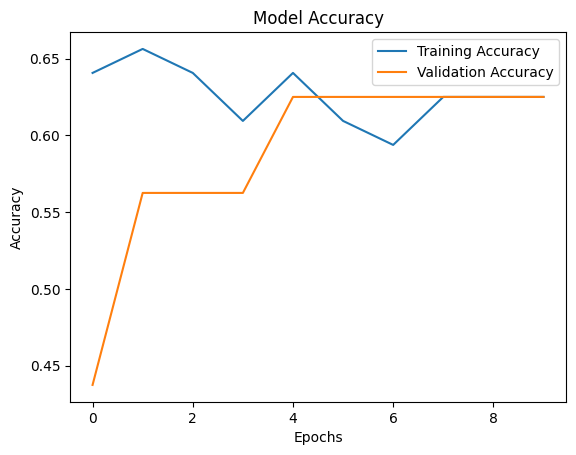

In [57]:
# Visualize the results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
# Test with real images
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img) / 255.0  # Normalizando a imagem
    img_array = tf.expand_dims(img_array, axis=0)  # Adicionando a dimensão de batch

    predictions = model.predict(img_array)  # Realizando a predição
    predicted_class_index = np.argmax(predictions)  # Pegando o índice da classe com maior probabilidade

    # Definindo as classes
    class_names = ['Batedeira', 'Liquidificador']  # Ordem de classes que você usou no treinamento
    predicted_class = class_names[predicted_class_index]  # Nome da classe com maior probabilidade

    print(f"The image is a: {predicted_class}, with probabilities: {predictions}")


Saving 4.jpg to 4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The image is a: Liquidificador, with probabilities: [[0.26794058 0.7320594 ]]
